In [1]:
from occultence import *

(0.99, 1.015)

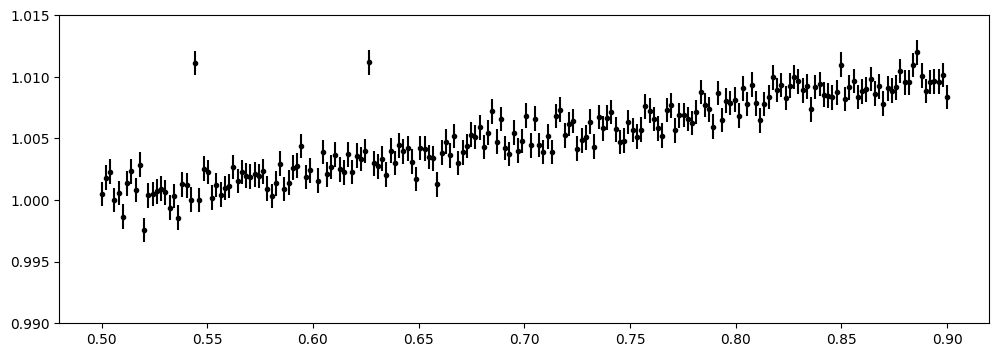

In [2]:
t = np.linspace(0.5,0.9,200)
ferr = 1e-3 * np.ones(len(t))
f = 1 + (ferr * (np.random.randn(len(t))))
f[22] = 1.01 # add a cosmic
f[63] = 1.008 # add a cosmic
f[50] = 0.0 # add a zero flux point
# f[100:120] *= 0.995 # add a transit
f *= np.linspace(1,1.01, len(t)) # add a linear trend for the GP to remove
plt.figure(figsize=(12,4))
plt.errorbar(t,f,ferr,fmt='k.')
plt.ylim(0.99,1.015)

In [3]:
targ = LightCurve(name = "test",
                  time = t,
                  flux = f,
                  uncertainty = np.abs(ferr),
                  metadata={'R_star':0.1*u.R_sun, 'M_star':0.1*u.M_sun})

🌈🤖 Warning! The time array is not an astropy.Time object, therefore there is no info about the 
format or scale.
We will assume that it is JD and TDB from here on!



In [4]:
targ_with_transit = targ.inject_transit(per=5*u.d, epoch=0.7 * u.d, inc=90 * u.degree, rp=1 * u.R_earth, ld=[0.3,0.3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Time [d]', ylabel='Flux'>

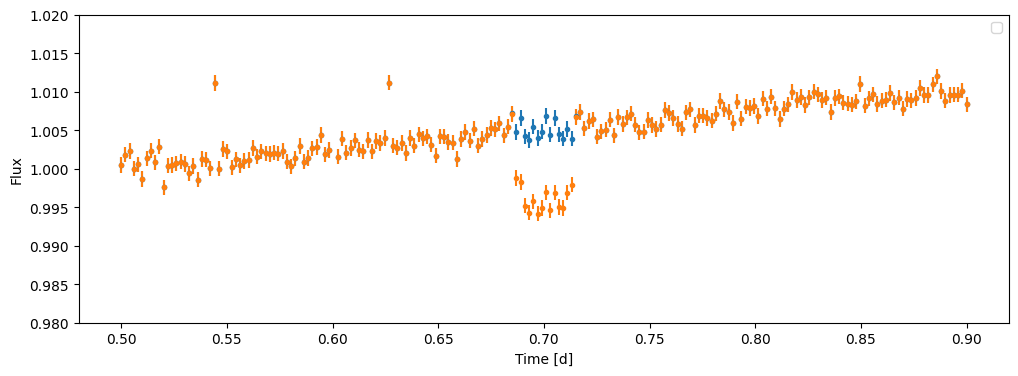

In [5]:
ax=targ.plot()
targ_with_transit.plot(ax=ax)

In [6]:
targ_with_transit.metadata

{'name': 'test_inject',
 'target': 'test',
 'R_star': <Quantity 0.1 solRad>,
 'M_star': <Quantity 0.1 solMass>,
 'injected_planet': {'period': [<Quantity 5. d>],
  'epoch': [<Quantity 0.7 d>],
  'inc': [<Quantity 90. deg>],
  'rp': [<Quantity 1. earthRad>],
  'a': [<Quantity 5.71151244 solRad>],
  'a_Rs': [<Quantity 57.11512439>],
  'ld': [[0.3, 0.3]],
  'depth': [<Quantity 0.00840502>],
  'duration': [<Quantity 0.03042218 d>]}}

In [7]:
planets = targ_with_transit.create_lots_of_transit_params(nfake=100, 
                                                          minimum_planet_radius=0.5 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                                          minimum_period=0.5 * u.d, maximum_period=1 * u.d,)

In [13]:
planets

,logP,phase,cosi,r_p,depth,duration,epoch,a,a_Rs,recovered,...,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,-0.234584,0.649382,0.014229,0.903314,0.006858296103106765,0.014516,0.878370,1.3626426208343891 solRad,13.62642620834389,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
1,-0.284807,0.397177,0.021443,1.754626,0.0258766267193426,0.014808,0.706147,1.261536133822697 solRad,12.615361338226968,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
2,-0.061064,0.356379,0.007767,0.748949,0.004714585332669929,0.016488,0.809634,1.7785330338992058 solRad,17.785330338992058,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
3,-0.015865,0.951620,0.002261,1.137807,0.0108811720953088,0.017774,1.417484,1.9063134827290467 solRad,19.063134827290465,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
4,-0.003752,0.186315,0.006436,1.937935,0.031565814104874655,0.019040,0.684713,1.9420922492761485 solRad,19.420922492761484,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.167868,0.757977,0.011131,1.521342,0.019453268090769252,0.016162,1.014977,1.509591218885256 solRad,15.09591218885256,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
96,-0.266553,0.300404,0.011093,2.688961,0.06077256051319443,0.016470,0.662612,1.297386683443948 solRad,12.97386683443948,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
97,-0.167824,0.679275,0.006619,1.445728,0.017567578082275916,0.016177,0.961553,1.509691509775302 solRad,15.096915097753019,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None
98,-0.028952,0.763108,0.003680,0.717054,0.004321574210661529,0.016959,1.213894,1.8683985910077743 solRad,18.68398591007774,0.0,...,0.0,0.0,0.0,0.0,0.0,test_inject,0.1 solRad,0.1 solMass,None,None


In [43]:
lcs, lcs_clean, lcs_gp, lcs_bls, planets_df = targ.full_injection_recovery(nfake=20, pool=False, minimum_planet_radius=0.1 * u.R_earth, maximum_planet_radius=3 * u.R_earth,
                                       minimum_period=0.5 * u.d, maximum_period=2 * u.d, recovery_kw = {'condition_on_epoch':1 * u.hour}, 
                                       verbose=False)

/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:78: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be applied!
  warnings.warn(f""" The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/catrionamurray/anaconda3/envs/occultence/lib/python3.9/site-packages/occultence/cleaning/clean.py:78: UserWarning:  The LightCurve's timelike dictionary does not appear to have the 'artifical_lightcurve' in it.
                 This array is necessary to calculate bad weather, therefore this will ** not ** be a

In [44]:
planets_df

,logP,phase,cosi,r_p,depth,duration,epoch,a,a_Rs,recovered,...,rec_depth,rec_duration,rec_epoch,run,snr,target,r_s,m_s,teff,spt
0,0.274135,0.203259,0.000584,2.099861,0.037061205502094095,0.023988,0.882108,2.9752816425955633 solRad,29.75281642595563,1.0,...,0.041769,0.02,0.882404,0.0,72.345440,test,0.1 solRad,0.1 solMass,None,None
1,-0.141815,0.540101,0.007791,2.358135,0.0467386386641261,0.017703,0.889637,1.5711857761578953 solRad,15.711857761578953,1.0,...,0.044895,0.02,0.887704,0.0,77.760727,test,0.1 solRad,0.1 solMass,None,None
2,0.150651,0.932605,0.002780,1.233680,0.012792159338890842,0.020331,1.819316,2.4615300902789135 solRad,24.615300902789134,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
3,-0.101919,0.930910,0.009344,2.258102,0.04285738990559449,0.018053,1.236189,1.6704183466946725 solRad,16.704183466946724,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
4,0.211938,0.137781,0.000021,0.117120,0.0001152928355766677,0.019385,0.724455,2.704352613542146 solRad,27.04352613542146,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
5,-0.037823,0.906806,0.001244,1.945137,0.03180085630581077,0.018662,1.331173,1.843129556668117 solRad,18.431295566681168,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
6,0.176685,0.729087,0.004015,1.421823,0.016991417537011083,0.021015,1.595126,2.561893052817196 solRad,25.61893052817196,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
7,0.184444,0.517489,0.004531,0.333719,0.0009360533668967798,0.019228,1.291308,2.592591311543044 solRad,25.925913115430436,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
8,0.201997,0.335543,0.000369,2.279016,0.04365494565718249,0.023012,1.034251,2.663398205100494 solRad,26.633982051004935,0.0,...,0.000000,0.00,0.000000,0.0,0.000000,test,0.1 solRad,0.1 solMass,None,None
9,0.240486,0.222277,0.000355,2.851588,0.0683458798862964,0.024731,0.886706,2.8254984169683732 solRad,28.25498416968373,1.0,...,0.068304,0.02,0.883304,0.0,136.607491,test,0.1 solRad,0.1 solMass,None,None


In [64]:
lcs[0].metadata, lcs_bls[0].metadata

({'name': 'test_inject0',
  'target': 'test',
  'R_star': <Quantity 0.1 solRad>,
  'M_star': <Quantity 0.1 solMass>,
  'injected_planet': {'period': [<Quantity 1.87990299 d>],
   'epoch': [<Quantity 0.88210801 d>],
   'inc': [<Quantity 1.57021198 rad>],
   'rp': [<Quantity 2.09986053 earthRad>],
   'a': [<Quantity 2.97528164 solRad>],
   'a_Rs': [<Quantity 29.75281643>],
   'ld': [[0.385, 0.304]],
   'depth': [<Quantity 0.03706121>],
   'duration': [<Quantity 0.02398782 d>]},
  'thresholds': {}},
 {'name': 'test_inject0_clean_bin_bls',
  'target': 'test',
  'R_star': <Quantity 0.1 solRad>,
  'M_star': <Quantity 0.1 solMass>,
  'injected_planet': {'period': [<Quantity 1.87990299 d>],
   'epoch': [<Quantity 0.88210801 d>],
   'inc': [<Quantity 1.57021198 rad>],
   'rp': [<Quantity 2.09986053 earthRad>],
   'a': [<Quantity 2.97528164 solRad>],
   'a_Rs': [<Quantity 29.75281643>],
   'ld': [[0.385, 0.304]],
   'depth': [<Quantity 0.03706121>],
   'duration': [<Quantity 0.02398782 d>]},
  '

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


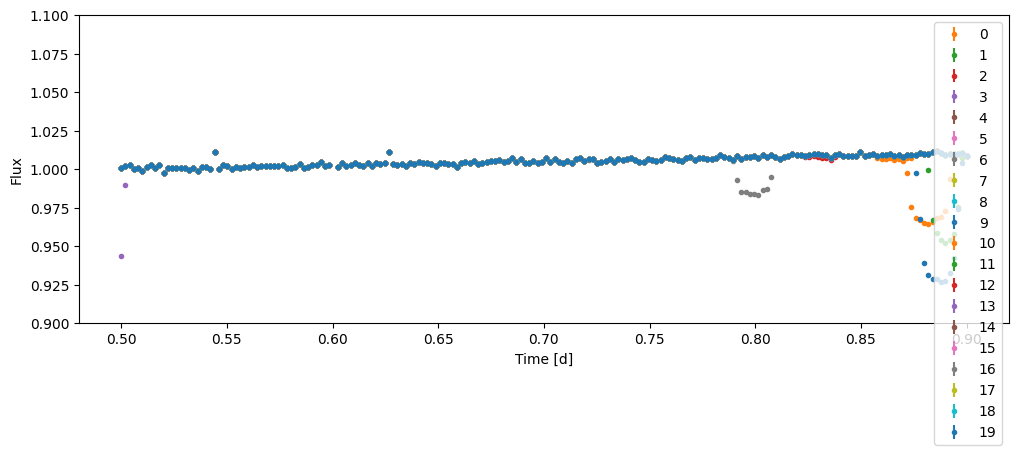

In [47]:
ax=targ.plot()
for i, lc in enumerate(lcs):
    lc.plot(ax=ax, label=i, ylims=[0.9,1.1])
plt.legend()

For whatever reason the pooling doesn't seem to work in Jupyter on my computer...?

In [48]:
# pool = mp.Pool(5)
# lcs = pool.starmap(inject_transit, [(targ, (10**logp) * u.d, phase * 10**logp * u.d, math.acos(cosi) * u.radian,
#                                               rp * u.R_earth, [0.1,0.1]) for
#                                              logp, phase, cosi, rp in zip(planets['logP'], planets['phase'], planets['cosi'],
#                                                                           planets['r_p'])])

Text(0.5, 0, 'Planet Radius [R_earth]')

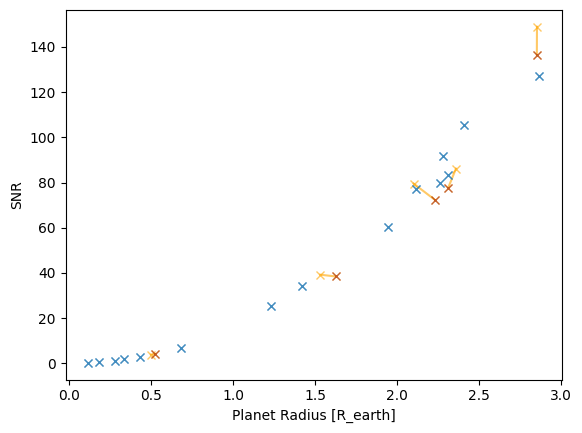

In [50]:
n_points_in_transit = planets_df['duration']/(7.5/(24*60))
lc_noise = 1e-3
rec_r_p = [x.to_value("R_earth") for x in (np.sqrt(planets_df['rec_depth']) * planets_df['r_s']).values]

for r_p, depth, rec, r_p_rec, snr, n in zip(planets_df['r_p'], planets_df['depth'],  planets_df['recovered'],rec_r_p,  planets_df['snr'], n_points_in_transit):
    if rec == 1.0:
        color = "orange"
    else:
        color = "C0"
    if r_p_rec == 0.0:
        r_p_rec = r_p
        snr = depth * np.sqrt(n)/lc_noise
    plt.plot([r_p,r_p_rec], [depth * np.sqrt(n)/lc_noise, snr], 'x-', color=color, alpha=0.6)
    if rec == 1.0:
        plt.plot([r_p_rec], [snr], 'x', color='darkred', alpha=0.5)
plt.ylabel("SNR")
plt.xlabel("Planet Radius [R_earth]")
# plot_transitparams(results[4]['r_p'], results[4]['depth'] * np.sqrt(n_points_in_transit)/lc_noise, results[4]['recovered'], xlabel="Radius", ylabel="SNR", zlabel="Detected?", ylims=[], yscale='uniform',
#                        xscale='uniform', add_points={}, svname="")

Print recovery stats:

In [60]:
print(f"Planets recovered: {100 * len(planets_df.loc[planets_df['recovered'] == 1.0]) /  len(planets_df['recovered'])}%")
print(f"Observed Planets recovered: {100 * len(planets_df.loc[(planets_df['recovered'] == 1.0) & (planets_df['observed'] == 1.0)]) /  len(planets_df['recovered'][planets_df['observed']==1.0])}%")

Planets recovered: 25.0%
Observed Planets recovered: 100.0%


Plot only the planets which were observed:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


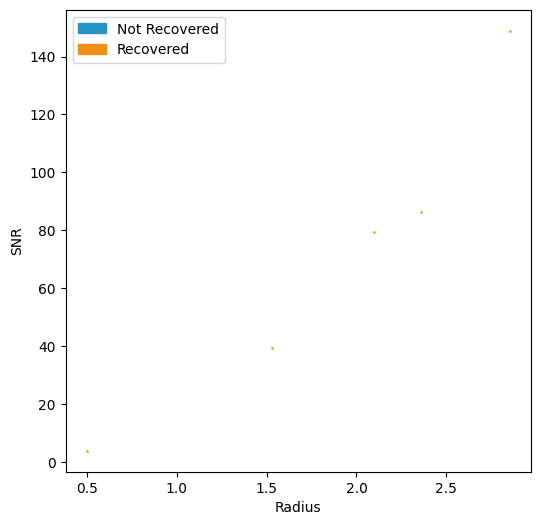

In [63]:
plot_transitparams(planets_df['r_p'][planets_df['observed'] == 1.0], planets_df['depth'][planets_df['observed'] == 1.0] * np.sqrt(n_points_in_transit[planets_df['observed'] == 1.0])/lc_noise, planets_df['recovered'][planets_df['observed'] == 1.0], xlabel="Radius", ylabel="SNR", zlabel="Detected?", ylims=[], yscale='uniform',
                       xscale='uniform', add_points={}, svname="")